## Case 2: Telemarketing

Today, marketing expenditure in the banking industry is massive, which means it is crucial for banks to optimize marketing strategies and enhance effectiveness. Understanding customer needs leads to more effective marketing plans, smarter product designs, and increased customer satisfaction. Our objective is to assess:
1 - Who the bank is targeting with its campaigns?
2 - Argue if the bank telemarketing strategy is appropriate.
3 - Profile the customers with higher likelihood of conversion and compare it with current bank targeting.

DESCRIPCION COLUMNAS

1. age: La edad del individuo (numérico).
2. job: La ocupación del individuo (categórico).
3. marital: El estado civil del individuo (categórico).
4. education: El nivel más alto de educación alcanzado por el individuo (categórico).
5. default: Si el individuo tiene una mora crediticia (categórico).
6. balance: El saldo de la cuenta bancaria del individuo (numérico).
7. housing: Si el individuo tiene un préstamo para vivienda (categórico).
8. loan: Si el individuo tiene un préstamo personal (categórico).
9. contact: El tipo de comunicación del contacto (categórico).
10. day: El día del mes en el que se realizó el contacto (numérico).
11. month: El mes en el que se realizó el contacto (categórico).
12. duration: La duración del último contacto en segundos (numérico).
13. campaign: la cantidad de contactos realizados durante esta campaña para el individuo (numérico).
14. pdays: la cantidad de días transcurridos desde que el individuo fue contactado por última vez (numérico).
15. previous: la cantidad de contactos realizados antes de esta campaña para el individuo (numérico).
16. poutcome: el resultado de la campaña de marketing anterior (categórico).
17. response: la respuesta del individuo a la campaña de marketing (categórica).
18. response_binary: una representación binaria de la respuesta, donde 1 indica una respuesta positiva y 0 indica una respuesta 
negativa (numérico).
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'bank-full_clean.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5.0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,5.0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,5.0


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,response_binary,month_int
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587,6.166401
std,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313,2.362637
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000,5.000000
50%,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000,6.000000
75%,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000,8.000000
max,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000,12.000000


In [4]:
#pdays tiene negativos, para ver si hay nulos (en este caso no tiene) y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
 17  month_int   

In [21]:
df.shape


(40841, 18)

In [22]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'response_binary', 'month_int'],
      dtype='object')

In [6]:
#vamos a ver si existen valores nulos. No tneemos nulos... Vamos bien
df.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
month_int          0
dtype: int64

In [7]:
#Analizamos columna pdays, y encontramos valores negativos
df['pdays'].value_counts()



pdays
-1      34797
 182      132
 92       123
 183      107
 181      106
        ...  
 626        1
 667        1
 421        1
 592        1
 33         1
Name: count, Length: 510, dtype: int64

In [9]:
#Nos quedamos con todos las filas que tienen una aceptacion de campaña (poutcome)
filtered_df = df[df['pdays'] < 1]  
summary = filtered_df.groupby('poutcome')['pdays'].describe()  
print(summary)  


            count  mean  std  min  25%  50%  75%  max
poutcome                                             
unknown   34797.0  -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0


In [10]:
# Corregimos los valores '-1' por '0'
df['pdays'] = df['pdays'].replace(-1, 0) 
df['pdays'].value_counts()         

pdays
0      34797
182      132
92       123
183      107
181      106
       ...  
626        1
667        1
421        1
592        1
33         1
Name: count, Length: 510, dtype: int64

In [13]:
# Comprobamos si tras el cambio de -1 a 0, genera duplicados
df = df.drop_duplicates()

In [14]:
# Visualizamos si el numero de filas ha cambiado. Vemos que las filas son las mismas, por lo que no se ha eliminado ningun duplicado.
df.shape

(40841, 18)

<Axes: xlabel='pdays', ylabel='Count'>

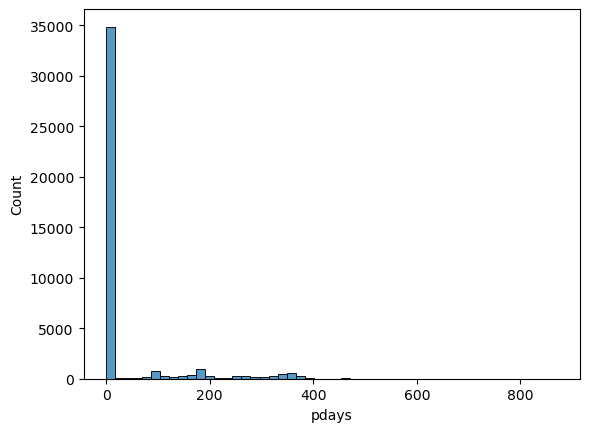

In [16]:
# Visualizamos el cambio y la distribucion de los pdays (con el valor ya cambiado)
sns.histplot(df['pdays'], bins = 50)

In [17]:
#Numero de intentos para el contacto de clientes/ dentro de los primeros 6 intentos se concentran el 90%
print(df['campaign'].sort_values().value_counts())


campaign
1     15788
2     11306
3      4954
4      3241
5      1606
6      1169
7       649
8       489
9       288
10      248
11      180
12      145
13      123
14       84
15       82
16       75
17       64
18       45
19       43
20       39
21       34
23       20
24       20
22       20
25       19
28       16
29       13
26       12
31       10
27        9
32        9
30        8
33        6
36        4
34        4
35        3
38        3
41        2
43        2
50        2
37        1
39        1
44        1
46        1
51        1
55        1
58        1
Name: count, dtype: int64


<Axes: xlabel='duration', ylabel='Count'>

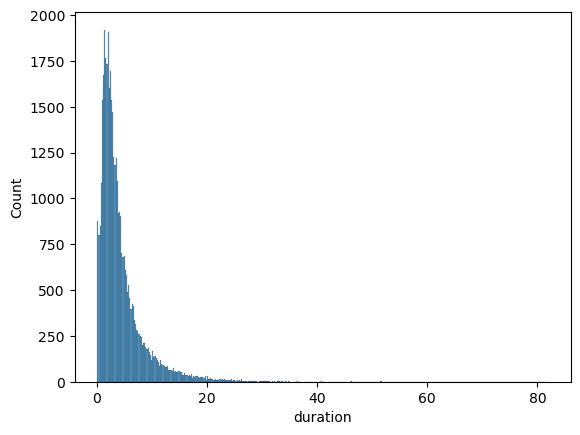

In [ ]:
#duracion aprox 28.33 min
sns.histplot(df['duration'])

In [43]:
print(df['duration'].value_counts())

duration
1.50     168
2.07     167
1.48     166
1.73     166
2.03     163
        ... 
18.55      1
28.02      1
23.48      1
25.60      1
25.93      1
Name: count, Length: 1539, dtype: int64


In [44]:
print(df['month'].value_counts()) 

month
may    12496
jul     6520
aug     5877
jun     4853
nov     3483
apr     2529
feb     2258
jan     1183
oct      605
sep      457
mar      407
dec      173
Name: count, dtype: int64


In [ ]:
#prestamo personal si / no
print(df['loan'].value_counts()) 

loan
no     34042
yes     6799
Name: count, dtype: int64


In [ ]:
# si tienen credito hipotecario
print(df['housing'].value_counts()) #Crédito hipotecario

housing
yes    22820
no     18021
Name: count, dtype: int64


In [47]:
print(df['balance'].value_counts()) #cantidad de dinero del cliente en el banco

balance
0       3272
1        183
2        149
4        131
3        125
        ... 
3390       1
9881       1
2534       1
2113       1
9299       1
Name: count, Length: 6350, dtype: int64


In [48]:
print(df['default'].value_counts()) #Deudor de pagos de tarjeta de crédito

default
no     40078
yes      763
Name: count, dtype: int64


In [49]:
print(df['education'].value_counts())

education
secondary    21933
tertiary     12380
primary       6528
Name: count, dtype: int64


In [50]:
print(df['marital'].value_counts())

marital
married     24641
single      11443
divorced     4757
Name: count, dtype: int64


In [51]:
print(df['job'].value_counts())
df['job'] = [x.replace('.','') for x in df['job']]

job
blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: count, dtype: int64


In [52]:
len(df)

40841

In [53]:
print(df.groupby('response')['poutcome'].value_counts(normalize=True))
print(df.groupby('response')['poutcome'].value_counts(normalize=False))

response  poutcome
no        unknown     0.873930
          failure     0.112397
          success     0.013673
yes       unknown     0.682044
          success     0.193145
          failure     0.124811
Name: proportion, dtype: float64
response  poutcome
no        unknown     31638
          failure      4069
          success       495
yes       unknown      3164
          success       896
          failure       579
Name: count, dtype: int64


In [54]:
print(df['response'].value_counts(normalize=True))

response
no     0.886413
yes    0.113587
Name: proportion, dtype: float64


In [55]:
print(df.groupby('age')['marital'].value_counts(normalize=True))

age  marital 
18   single      1.000000
19   single      1.000000
20   single      0.968750
     married     0.031250
21   single      0.923077
                   ...   
89   married     1.000000
90   divorced    1.000000
94   divorced    1.000000
95   divorced    0.500000
     married     0.500000
Name: proportion, Length: 194, dtype: float64


In [ ]:
#buen pagador 98%
#18 a 95 años| 84% de educacion => secundaria | situacion sentimental estable



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
 17  month_int   

In [59]:
print(df['education'].value_counts(normalize=True))

education
secondary    0.537034
tertiary     0.303127
primary      0.159839
Name: proportion, dtype: float64


In [80]:
print(df['response_binary'].value_counts(normalize=True))

response_binary
0    0.886413
1    0.113587
Name: proportion, dtype: float64


In [68]:
filtered_df = df[df['response_binary'] > 0]  
summary = filtered_df.groupby('poutcome')['pdays'].describe()  
print(summary)  



           count        mean         std  min    25%    50%    75%    max
poutcome                                                                 
failure    579.0  233.625216  149.241483  4.0  110.0  184.0  338.0  854.0
success    896.0  161.667411   92.737998  1.0   92.0  174.0  185.0  561.0
unknown   3164.0    0.090392    3.768605  0.0    0.0    0.0    0.0  188.0


In [103]:
print(filtered_df.groupby('job')['balance'].value_counts(normalize=True))

job         balance
admin       0          0.060391
            169        0.008881
            602        0.008881
            3735       0.008881
            19         0.007105
                         ...   
unemployed  6748       0.005263
            7105       0.005263
            7459       0.005263
            7620       0.005263
            7724       0.005263
Name: proportion, Length: 3202, dtype: float64


In [109]:
filtered_df.shape

(4639, 19)

In [105]:
 bins = range(0, filtered_df['age'].max() + 10, 10) 

In [113]:
 bins = range(0, filtered_df['age'].max() + 10, 10)  # Create bins from 0 to the max age, in steps of 10  
 labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Create labels for each bin (e.g., "0-9", "10-19")  
   
 # Create a new column 'age_range' in filtered_df  
 filtered_df['age_range'] = pd.cut(filtered_df['age'], bins=bins, labels=labels, right=False)  
   
 # Display the first few rows to confirm  
 print(filtered_df[['age', 'age_range']].head())  

     age age_range
72    59     50-59
75    56     50-59
76    41     40-49
115   55     50-59
149   54     50-59


C:\Users\alfredo.sanchez.PKDGALATEAPROJE\AppData\Local\Temp\ipykernel_9120\1267945498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_range'] = pd.cut(filtered_df['age'], bins=bins, labels=labels, right=False)


In [ ]:
 bins = range(0, df['age'].max() + 10, 10)  # Create bins from 0 to the max age, in steps of 10  
 labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Create labels for each bin (e.g., "0-9", "10-19")  
   
 # Create a new column 'age_range' in filtered_df  
 df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)  
   
 # Display the first few rows to confirm  
 print(df[['age', 'age_range']].head())  

   age age_range
0   58     50-59
1   44     40-49
2   33     30-39
3   35     30-39
4   28     20-29


In [118]:
df.groupby('age_range')['age'].describe() 

C:\Users\alfredo.sanchez.PKDGALATEAPROJE\AppData\Local\Temp\ipykernel_9120\4003428940.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_range')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
0-9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-19,27.0,18.851852,0.362014,18.0,19.0,19.0,19.0,19.0
20-29,4718.0,26.733362,2.033667,20.0,26.0,27.0,28.0,29.0
30-39,16566.0,34.245986,2.781125,30.0,32.0,34.0,37.0,39.0
40-49,10528.0,44.230243,2.871424,40.0,42.0,44.0,47.0,49.0
50-59,7514.0,54.272691,2.889238,50.0,52.0,54.0,57.0,59.0
60-69,1037.0,62.029894,2.704578,60.0,60.0,61.0,64.0,69.0
70-79,346.0,73.641618,2.809694,70.0,71.0,73.0,76.0,79.0
80-89,100.0,82.460000,2.371634,80.0,80.0,82.0,83.0,89.0


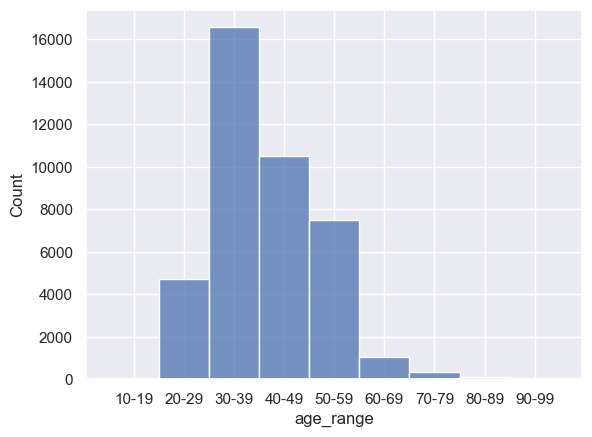

In [119]:
g = sns.histplot(data=df['age_range'])

In [114]:
filtered_df.groupby('age_range')['age'].describe() 

C:\Users\alfredo.sanchez.PKDGALATEAPROJE\AppData\Local\Temp\ipykernel_9120\1152925319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby('age_range')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
0-9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-19,10.0,18.800000,0.421637,18.0,19.00,19.0,19.00,19.0
20-29,796.0,26.310302,2.235324,20.0,25.00,27.0,28.00,29.0
30-39,1717.0,34.091439,2.777348,30.0,32.00,34.0,36.00,39.0
40-49,929.0,44.351991,2.926156,40.0,42.00,44.0,47.00,49.0
50-59,690.0,54.536232,2.896270,50.0,52.00,54.0,57.00,59.0
60-69,299.0,63.026756,2.843682,60.0,60.00,62.0,65.00,69.0
70-79,155.0,73.877419,2.726340,70.0,72.00,73.0,76.00,79.0
80-89,40.0,82.700000,2.311621,80.0,80.75,82.0,84.25,87.0


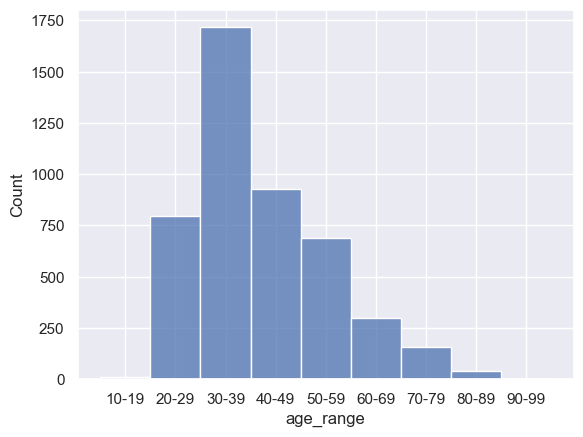

In [115]:
g = sns.histplot(data=filtered_df['age_range'])

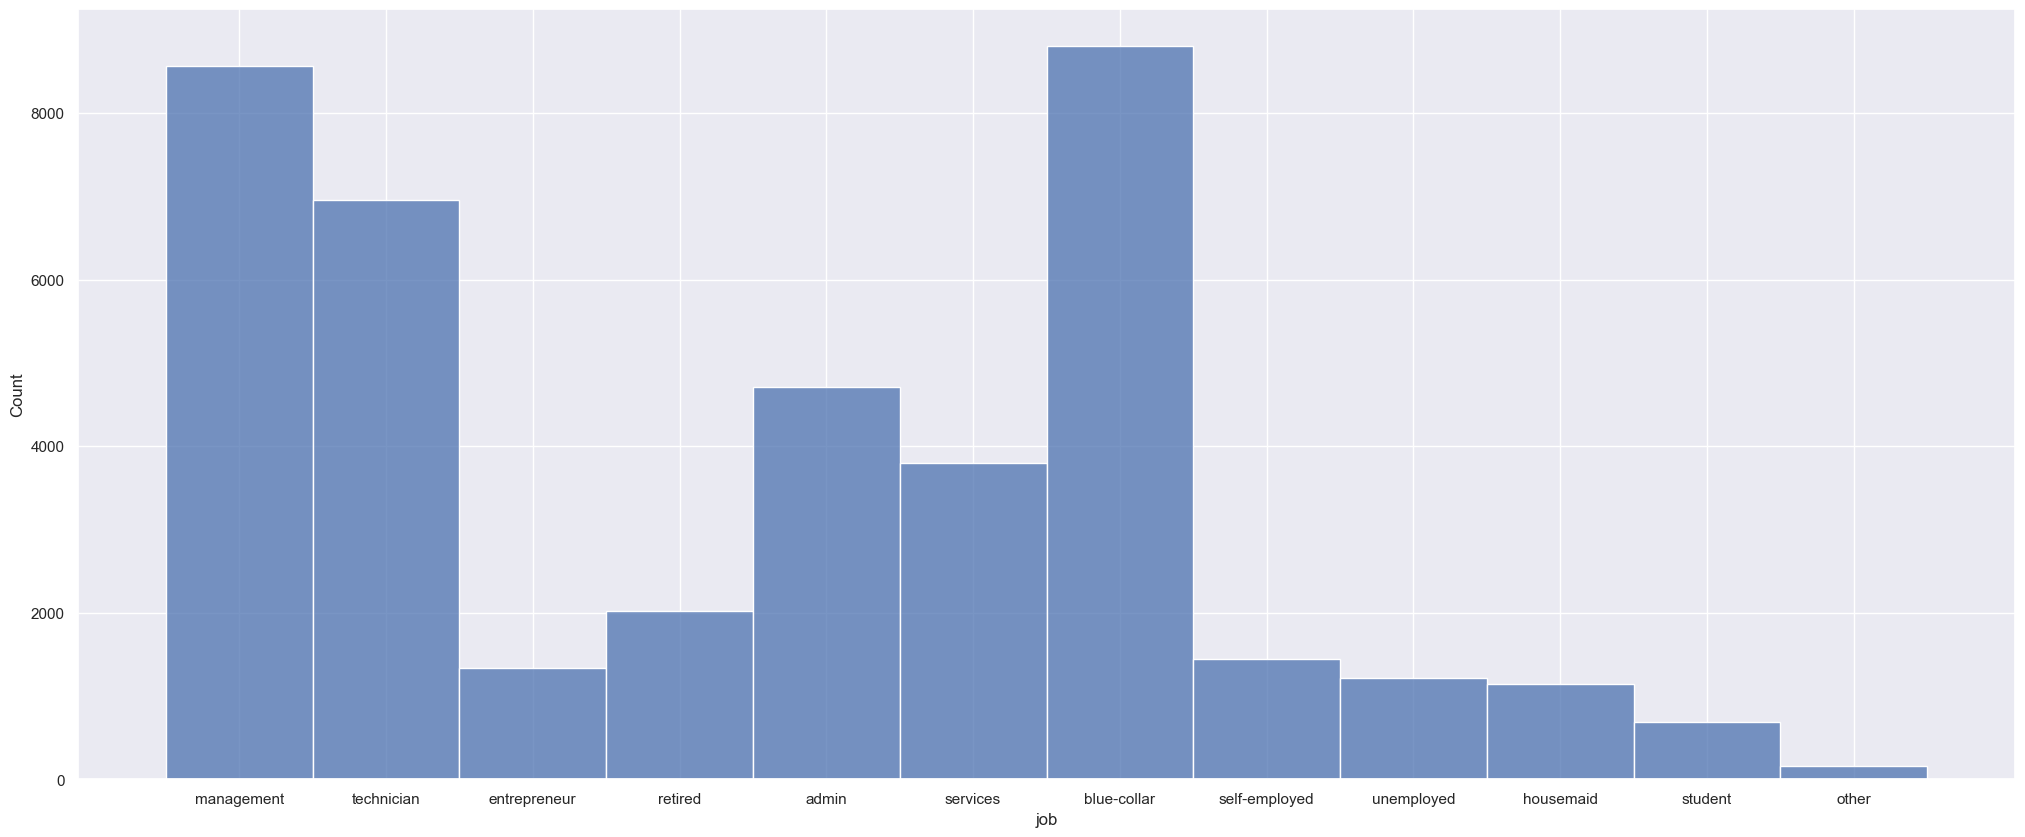

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))

sns.histplot(df['job'])

plt.show()

In [91]:
print(filtered_df.groupby('age')['marital'].value_counts(normalize=True))

age  marital 
18   single      1.000000
19   single      1.000000
20   single      1.000000
21   single      0.947368
     married     0.052632
                   ...   
86   single      0.250000
87   married     0.666667
     divorced    0.333333
90   divorced    1.000000
95   divorced    1.000000
Name: proportion, Length: 178, dtype: float64


In [83]:
print(filtered_df['poutcome'].value_counts(normalize=True))

poutcome
unknown    0.682044
success    0.193145
failure    0.124811
Name: proportion, dtype: float64


In [84]:
print(filtered_df['marital'].value_counts(normalize=True))

marital
married     0.520155
single      0.360854
divorced    0.118991
Name: proportion, dtype: float64


In [73]:
print(filtered_df['job'].value_counts(normalize=True))

job
management       0.242509
technician       0.162535
blue-collar      0.137314
admin            0.121362
retired          0.096573
services         0.071567
student          0.043759
unemployed       0.040957
self-employed    0.034921
entrepreneur     0.023496
housemaid        0.021772
other            0.003233
Name: proportion, dtype: float64


In [75]:
print(filtered_df['education'].value_counts(normalize=True))

education
secondary    0.491270
tertiary     0.390817
primary      0.117913
Name: proportion, dtype: float64


In [76]:
print(filtered_df['month'].value_counts(normalize=True))

month
may    0.178056
aug    0.132356
jul    0.118991
apr    0.106920
jun    0.105626
feb    0.084070
nov    0.076310
oct    0.058633
sep    0.048071
mar    0.047640
jan    0.026299
dec    0.017030
Name: proportion, dtype: float64


In [79]:
print(filtered_df['campaign'].value_counts(normalize=True))

campaign
1     0.486096
2     0.262988
3     0.115327
4     0.059927
5     0.027161
6     0.018107
7     0.008623
8     0.006467
9     0.003233
11    0.003018
10    0.002802
13    0.001293
17    0.000862
15    0.000862
14    0.000862
12    0.000862
16    0.000431
24    0.000216
32    0.000216
29    0.000216
21    0.000216
20    0.000216
Name: proportion, dtype: float64


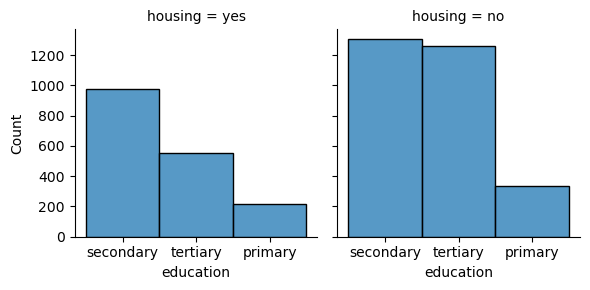

In [86]:
g = sns.FacetGrid(data=filtered_df, col='housing')
g.map(sns.histplot, 'education',kde=False)

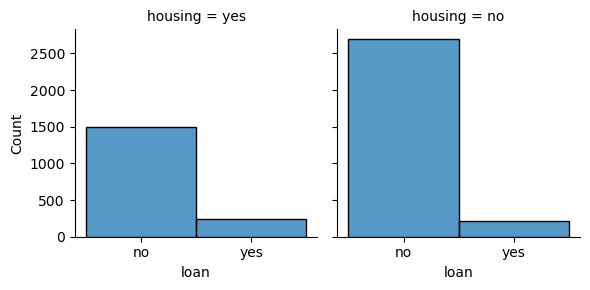

In [87]:
g = sns.FacetGrid(data=filtered_df, col='housing')
g.map(sns.histplot, 'loan',kde=False)

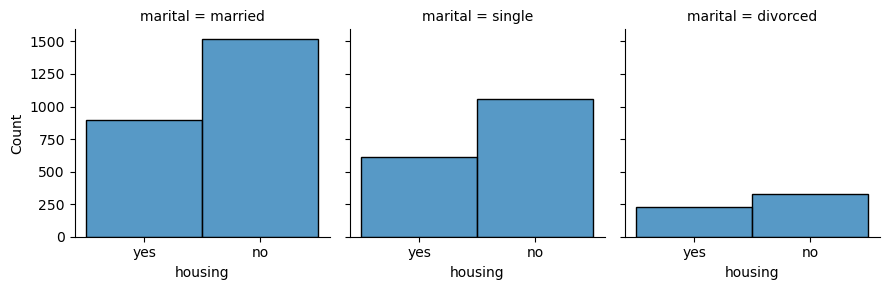

In [88]:
g = sns.FacetGrid(data=filtered_df, col='marital')
g.map(sns.histplot, 'housing',kde=False)

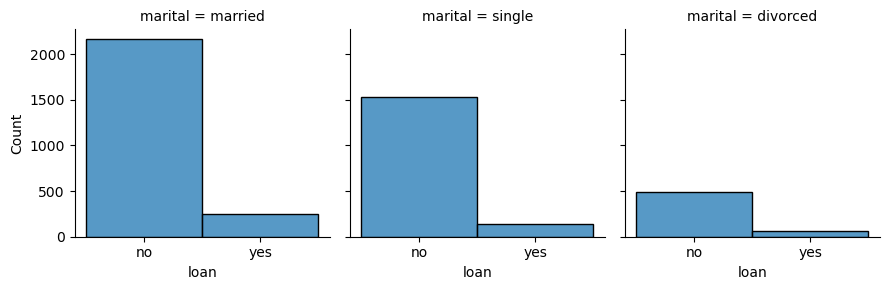

In [94]:
g = sns.FacetGrid(data=filtered_df, col='marital')
g.map(sns.histplot, 'loan',kde=False)

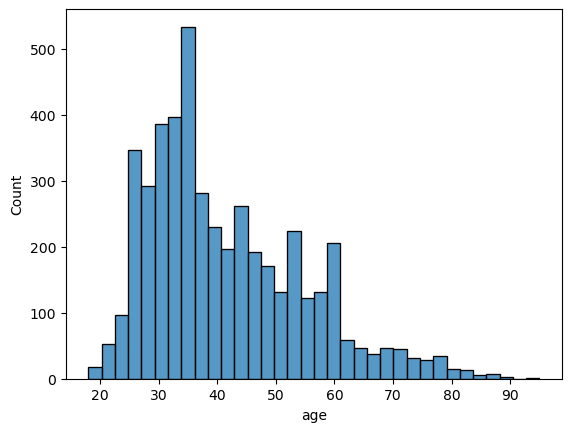

In [95]:
g = sns.histplot(data=filtered_df['age'])

In [ ]:
g = sns.histplot(data=filtered_df['age'])

Axes(0.125,0.11;0.775x0.77)


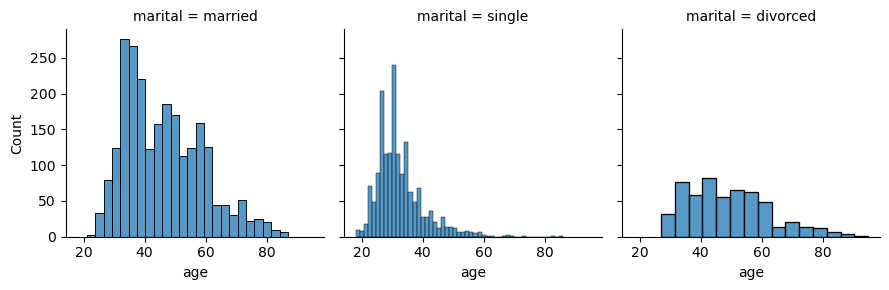

In [97]:
g = sns.FacetGrid(data=filtered_df, col='marital')
g.map(sns.histplot, 'age',kde=False)

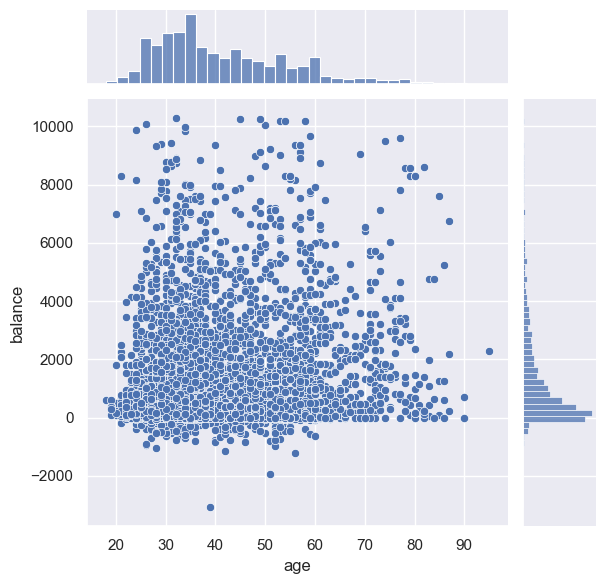

In [101]:
# Return font size to its original scale
sns.set(font_scale=1)

# Joint Distribution Plot
sns.jointplot(x='age', y='balance', data=filtered_df)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.random.random((16, 16))
ax.imshow(x)
plt.show()

In [128]:
print(filtered_df['campaign'].value_counts(normalize=True))

campaign
1     0.486096
2     0.262988
3     0.115327
4     0.059927
5     0.027161
6     0.018107
7     0.008623
8     0.006467
9     0.003233
11    0.003018
10    0.002802
13    0.001293
17    0.000862
15    0.000862
14    0.000862
12    0.000862
16    0.000431
24    0.000216
32    0.000216
29    0.000216
21    0.000216
20    0.000216
Name: proportion, dtype: float64


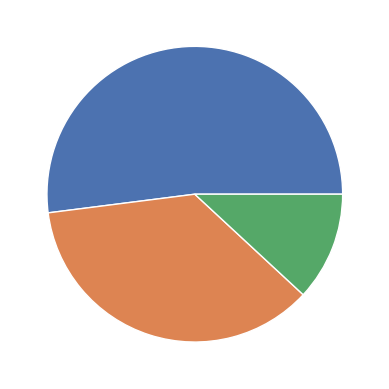

In [129]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(filtered_df['marital'].value_counts(normalize=True))
plt.show()

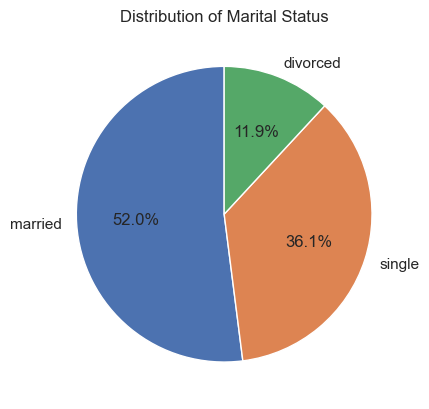

In [130]:
 import matplotlib.pyplot as plt  
   
 # Calculate the proportions and labels  
 marital_counts = filtered_df['marital'].value_counts(normalize=True)  
 labels = marital_counts.index  # Extract the unique categories as labels  
   
 # Create the pie chart  
 fig, ax = plt.subplots()  
 ax.pie(marital_counts, labels=labels, autopct='%1.1f%%', startangle=90)  # Add labels and percentages  
 plt.title('Distribution of Marital Status')  
 plt.show()  

In [ ]:
 import matplotlib.pyplot as plt  
   
 # Calculate the proportions and labels  
 marital_counts = filtered_df['marital'].value_counts(normalize=True)  
 labels = marital_counts.index  # Extract the unique categories as labels  
   
 # Create the pie chart  
 fig, ax = plt.subplots()  
 ax.pie(marital_counts, labels=labels, autopct='%1.1f%%', startangle=90)  # Add labels and percentages  
 plt.title('Distribution of Marital Status')  
 plt.show()  

In [82]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 72 to 40839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4639 non-null   int64  
 1   job              4639 non-null   object 
 2   marital          4639 non-null   object 
 3   education        4639 non-null   object 
 4   default          4639 non-null   object 
 5   balance          4639 non-null   int64  
 6   housing          4639 non-null   object 
 7   loan             4639 non-null   object 
 8   day              4639 non-null   int64  
 9   month            4639 non-null   object 
 10  duration         4639 non-null   float64
 11  campaign         4639 non-null   int64  
 12  pdays            4639 non-null   int64  
 13  previous         4639 non-null   int64  
 14  poutcome         4639 non-null   object 
 15  response         4639 non-null   object 
 16  response_binary  4639 non-null   int64  
 17  month_int        

In [ ]:
sns.histplot(df_filtrado['age'])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))

sns.histplot(df_filtrado['job'])

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x=df['job'], y=df['age'])
plt.xticks(rotation=45)
plt.title('Boxplot de Edad por Tipo de Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

In [ ]:
# Mostrar distribución de llamadas que llevaron a venta
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['campaign'], bins=range(0, int(df_filtrado['campaign'].max()) + 2), kde=False)
plt.title('Distribución de llamadas realizadas para obtener venta')
plt.xlabel('Número de llamadas (campaign)')
plt.ylabel('campaign')
plt.show()

In [ ]:
# Calcular el número promedio de llamadas (columna 'previous')
avg_calls = df_filtrado['campaign'].mean()
print('Número promedio de llamadas para obtener una venta:', avg_calls)

In [ ]:
# Calcular las medias de duración y de cantidad de llamadas (campaign) para ventas
mean_duration_yes = df_filtrado['duration'].mean()
mean_campaign_yes = df_filtrado['campaign'].mean()

# Crear gráfico de dispersión con ejes intercambiados
plt.figure(figsize=(12, 8))

# Gráfico de dispersión completo
sns.scatterplot(x='duration', y='campaign', data=df, alpha=0.5, hue='response', palette={'yes': 'green', 'no': 'red'})

# Añadir línea vertical y horizontal correspondientes a las medias de "yes"
plt.axvline(x=mean_duration_yes, color='green', linestyle='--', label='Media Duración (yes)')
plt.axhline(y=mean_campaign_yes, color='green', linestyle=':', label='Media Llamadas (yes)')

plt.title('Relación entre Duración de Llamada y Cantidad de Llamadas, con Medias para Ventas (yes)')
plt.xlabel('Duración de Llamada (segundos)')
plt.ylabel('Cantidad de Llamadas (campaign)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print('Se ha generado el gráfico de dispersión con las medias para ventas (yes).')